Three main areas this program will focus on ..
- Pattern recognition and classification tasks
- Where an object is in a image (using region based cnn)
- Object tracking and Localization

## Computer Vision Course Overview
This Nanodegree program is broken into three main sections:

1. Intro to Computer Vision, which covers topics like image processing, feature extraction done manually or through training a convolutional neural network (CNN) using PyTorch.
2. Advanced Computer Vision and Deep Learning, which is all about advances in deep learning architectures like region-based CNN's, YOLO and single-shot detection algorithms, and CNN's used in combination with recurrent neural networks.
3. Object Tracking and Localization, which covers how a robot can move and sense the world around it, creating a visual representation of the world as it navigates.

Each of these three sections will have an associated project that allows you to demonstrate the skills you've learned in each part.
![](img/projects.png)

1. Facial Keypoint Detection
2. Automatic Image Captioning
3. Localization and Mapping

## Pattern recognition

**Computer Vision Pipeline**
A computer vision pipeline is a series of steps that most computer vision applications will go through. Many vision applications start off by acquiring images and data, then processing that data, performing some analysis and recognition steps, then finally performing an action. The general pipeline is pictured below!
![](img/pipeline.png)
facial expression recognition
![](img/pipeline1.png)

**Training a Neural Network**
To train a computer vision neural network, we typically provide sets of labelled images, which we can compare to the predicted output label or recognition measurements. The neural network then monitors any errors it makes (by comparing the correct label to the output label) and corrects for them by modifying how it finds and prioritizes patterns and differences among the image data. Eventually, given enough labelled data, the model should be able to characterize any new, unlabeled, image data it sees!

Color Spaces

![](img/color_spaces.PNG)
![](img/color_spaces1.PNG)

**Average Brightness**
Here were the steps we took to extract the average brightness of an image.

Convert the image to HSV color space (the Value channel is an approximation for brightness)
Sum up all the values of the pixels in the Value channel
Divide that brightness sum by the area of the image, which is just the width times the height.
This gave us one value: the average brightness or the average Value of that image.

### Filters

Convolution Kernels
For edge detection, sum of elements of kernels equal to zero
If the sum is not equal to zero, then it will be either +ve or -ve
+ve will brighten the image and  -ve will darken the image
For horizontal edge detection, kernel finds the difference between the top and bottom edges surrounding a given pixel is equal to zero



- High-frequency image pattern: changes very rapidly from one brightness to another
- Low frequency image may be one that is relatively uniform in brightness or changes very slowly

[Fourier Transform(FT)](https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_imgproc/py_transforms/py_fourier_transform/py_fourier_transform.html)
- image processing tool which is used to decompose an image into its frequency components.FT's are done with OpenCV or with Numpy
- OpenCV functions cv2.dft() and cv2.idft() are faster than Numpy counterparts. But Numpy functions are more user-friendly
- OpenCV functions are around 3x faster than Numpy functions
- For images, 2D Discrete Fourier Transform (DFT) is used to find the frequency domain. A fast algorithm called Fast Fourier Transform (FFT) is used for calculation of DFT.
- FT uing Numpy
           img = cv2.imread('img.jpg',0)
           f = np.fft.fft2(img)
           fshift = np.fft.fftshift(f)
           magnitude_spectrum = 20*np.log(np.abs(fshift))

- np.fft.fft2() provides us the frequency transform which will be a complex array. Its first argument is the input image, which is grayscale. Second argument is optional which decides the size of output array. If it is greater than size of input image, input image is padded with zeros before calculation of FFT. If it is less than input image, input image will be cropped. If no arguments passed, Output array size will be same as input.
- Now once you got the result, zero frequency component (DC component) will be at top left corner. If you want to bring it to center, you need to shift the result by \frac{N}{2} in both the directions. This is simply done by the function, np.fft.fftshift(). (It is more easier to analyze). Once you found the frequency transform, you can find the magnitude spectrum.

[OPEN CV Forurier Transform](https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_imgproc/py_transforms/py_fourier_transform/py_fourier_transform.html)

In [ ]:
img = cv2.imread('images/stripes.jpg') # Read in the images
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Change color to RGB (from BGR)
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY) # convert to grayscale
norm_image = gray/255.0 # normalize the image

# perform a fast fourier transform and create a scaled, frequency transform image
def ft_image(norm_image):
    '''This function takes in a normalized, grayscale image
       and returns a frequency spectrum transform of that image. '''
    f = np.fft.fft2(norm_image)              # perform a fast fourier transform
    fshift = np.fft.fftshift(f)
    frequency_tx = 20*np.log(np.abs(fshift)) # frequency transform image
    
    return frequency_tx

**Frequency in images** is a rate of change
- A high frequency image is one where the intensity changes a lot. 
- A low frequency image may be one that is relatively uniform in brightness or changes very slowly
- For example:
  <img src="img/frequency in images.PNG" width="500">
  
- High-frequency components also correspond to the edges of objects in images, which can help us classify those objects

**High pass filter:** will sharpen an image and enhance high-frequency parts of an image and where there is no change or little change it will block the pixcels out and turn the area black 
- high pass filter is used for edge detection
  <img src="img/edge_detection.PNG" width="500">
- for edge detection, all of the elements in the matrix sum to 0
- if the sum is not 0 that means it is either +vely or -vely weighted. Which will either brighten or darken the entair image
  <img src="img/high pass filter.PNG" width="500">
  
**Filter or Kernal** 
- It is a square matrix of size of odd numbers (usually 3X3 or 5X5)
- Will filter out unwanted information in a image
- Will amplify features like object boundries or others
- will produce output that shows various edges and shapes

**Sobel Filters**
- For finding vertical edges and lines in an image, we will select a kernel something like this. This is called Sobel filter (Sobelx)
            -1  0  1
            -2  0  2
            -1  0  1
- For finding horizantal edges and lines in an image, we will select a kernel something like this. his is called Sobel filter (Sobely)
            -1 -2 -1
             0  0  0
             1  2  1

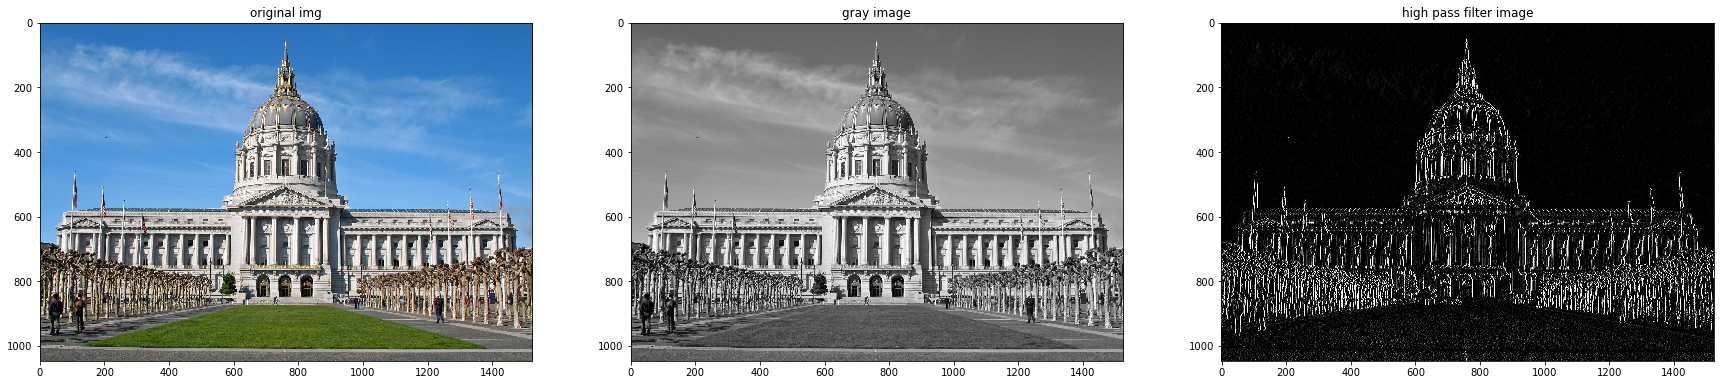

In [33]:
#### Example of High Pass Filter
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

image = mpimg.imread('img/city_hall.jpg') # Read in the image
image_copy = np.copy(image) # Make a copy of the image
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY) # Convert to grayscale for filtering

# Vertical filter
sobel_x = np.array([[-1,0,1],         
                    [-2,0,2],
                    [-1,0,1]])

# Filter the image using filter2D, which has inputs: (grayscale image, bit-depth, kernel)  
high_pass_filter_img = cv2.filter2D(gray, -1, sobel_x)

f, (ax1,ax2,ax3) = plt.subplots(1,3, figsize = (30,10))

ax1.set_title('original img')
ax1.imshow(image_copy)

ax2.set_title('gray image')
ax2.imshow(gray, cmap='gray')

ax3.set_title('high pass filter image')
ax3.imshow(high_pass_filter_img, cmap='gray')

**Low Pass Filter:** Low pass filters will blur / smooth an image and reduce noise. In the image above, high pass filter created vertical edges but along with that we see noise (dots) as well. No reduce the noise and to smooth an image, we will use low pass filters like Averaging filter, Gaussian blur, Median blur, Bilateral  filter. 
<img src="img/low_pass_filter.PNG" width="500">
<img src="img/blur.PNG" width="500">

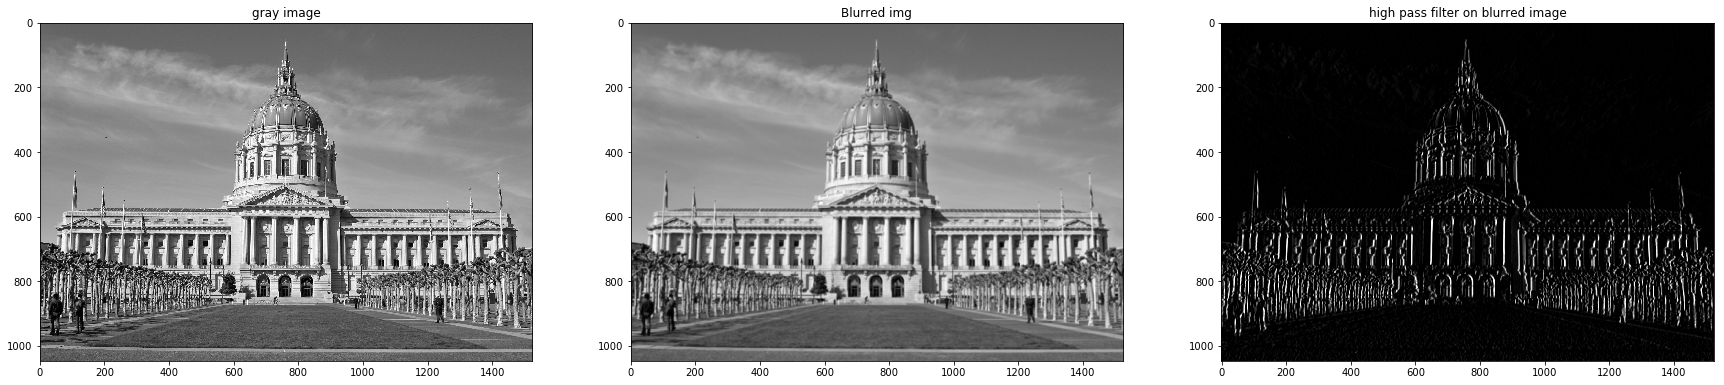

In [34]:
# lets use above gray image to blur it before we use high pass filter
gray_blur = cv2.GaussianBlur(gray, (9, 9), 0) # Create a Gaussian blurred image

# Vertical filter
sobel_x = np.array([[-1,0,1],         
                    [-2,0,2],
                    [-1,0,1]])

# Filter the image using filter2D, which has inputs: (grayscale image, bit-depth, kernel)  
high_pass_filter_img_OnBlur = cv2.filter2D(gray_blur, -1, sobel_x)

f, (ax1,ax2,ax3) = plt.subplots(1,3, figsize = (30,10))

ax1.set_title('gray image')
ax1.imshow(gray, cmap='gray')

ax2.set_title('Blurred img')
ax2.imshow(gray_blur, cmap='gray')

ax3.set_title('high pass filter on blurred image')
ax3.imshow(high_pass_filter_img_OnBlur, cmap='gray')

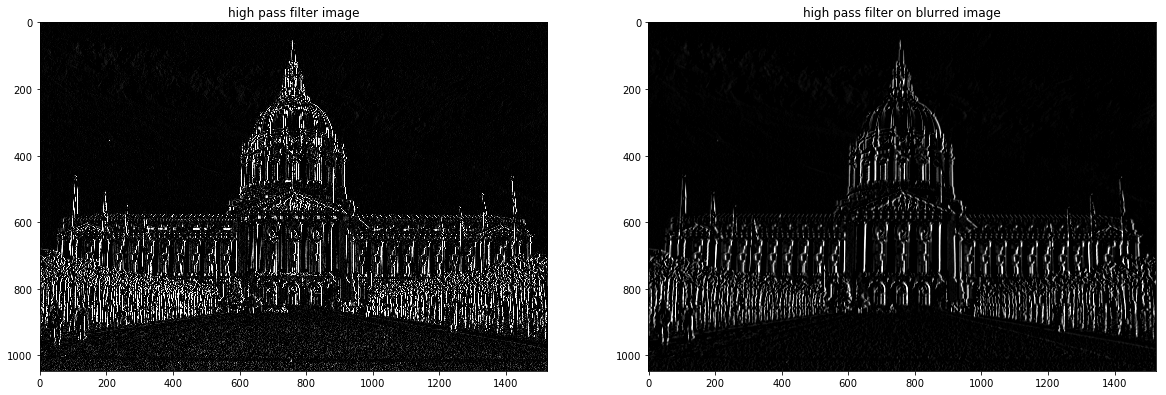

In [35]:
# comparing high pass filter on without and with blur

f,(ax1,ax2) = plt.subplots(1,2, figsize=(20,10))

ax1.set_title('high pass filter image')
ax1.imshow(high_pass_filter_img, cmap='gray')

ax2.set_title('high pass filter on blurred image')
ax2.imshow(high_pass_filter_img_OnBlur, cmap='gray')

We can clearly see that blurring the image before using high pass filter did help in removing the noise

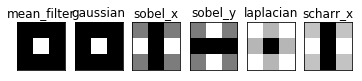

In [36]:
# Using Fourier Transform lets see why certain filter is High pass or Low pass
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#Defining filters 
#################

# simple averaging filter without scaling parameter
mean_filter = np.ones((3,3))

# creating a guassian filter
gaussian = (1/9)*np.array([[1, 1, 1],
                           [1, 1, 1],
                           [1, 1, 1]])

# sobel (in x direction) edge detecting filter (Vertical filters)
sobel_x= np.array([[-1, 0, 1],
                   [-2, 0, 2],
                   [-1, 0, 1]])

# sobel (in y direction) edge detecting filter (Horizontal filters)
sobel_y= np.array([[-1,-2,-1],
                   [0, 0, 0],
                   [1, 2, 1]])

# laplacian, edge filter
laplacian=np.array([[0, 1, 0],
                    [1,-4, 1],
                    [0, 1, 0]])

# scharr (in x-direction) edge detecting filter
scharr = np.array([[-3, 0, 3],
                   [-10,0,10],
                   [-3, 0, 3]])

filters = [mean_filter, gaussian, sobel_x, sobel_y, laplacian, scharr]
filter_name = ['mean_filter','gaussian','sobel_x','sobel_y', 'laplacian', 'scharr_x']


# perform a fast fourier transform on each filter (to create a scaled, frequency transform image)
#################################################
f_filters = [np.fft.fft2(x) for x in filters]
fshift = [np.fft.fftshift(y) for y in f_filters]
frequency_tx = [np.log(np.abs(z)+1) for z in fshift]

# displaying filters
####################
for i in range(len(filters)):
    plt.subplot(1,6,i+1), plt.imshow(frequency_tx[i],cmap = 'gray')
    plt.title(filter_name[i]), plt.xticks([]), plt.yticks([])

plt.show()

- Low frequencies in the frequency spectrum are at the center of the frequency transform image where as high frequencies are at the edges. 
- Areas of white or light gray, allow that part of the frequency spectrum through! Areas of black mean that part of the spectrum is blocked out of the image.
- You can see that the Gaussian filter and mean filter allows only low-pass frequencies through, which is the center of the frequency transformed image. 
- The sobel and scharr filters block out frequencies of a certain orientation and a laplace (detects edges regardless of orientation) filter, should block out low-frequencies

Note: Laplacian Operator is also known as a derivative operator which is used to find edges in an image. The major difference between Laplacian and other operators like Prewitt, Sobel, Robinson and Kirsch is that these all are first order derivative masks but Laplacian is a second order derivative mask. In this mask we have two further classifications one is Positive Laplacian Operator and other is Negative Laplacian Operator. Another difference between Laplacian and other operators is that unlike other operators Laplacian didn’t take out edges in any particular direction but it take out edges in Inward and outward Edges classification.

**The convolutional layer is produced by applying a series of many different image filters, also known as convolutional kernels, to an input image**

### Canny Edge Detection

It is widely used edge detection algorithm. Folling steps used to create this 
1. Filters out noise using a Gaussian blur
2. Finds the strenght and direction of edges using Sobel filters
3. Applies non maxium supression to isolate the strongest edges and thin them to one pixel wide lines
4. Uses hysteresis (double thresholding process)to isolate the best edges
<img src="img/canny edge detector.PNG" width="500">

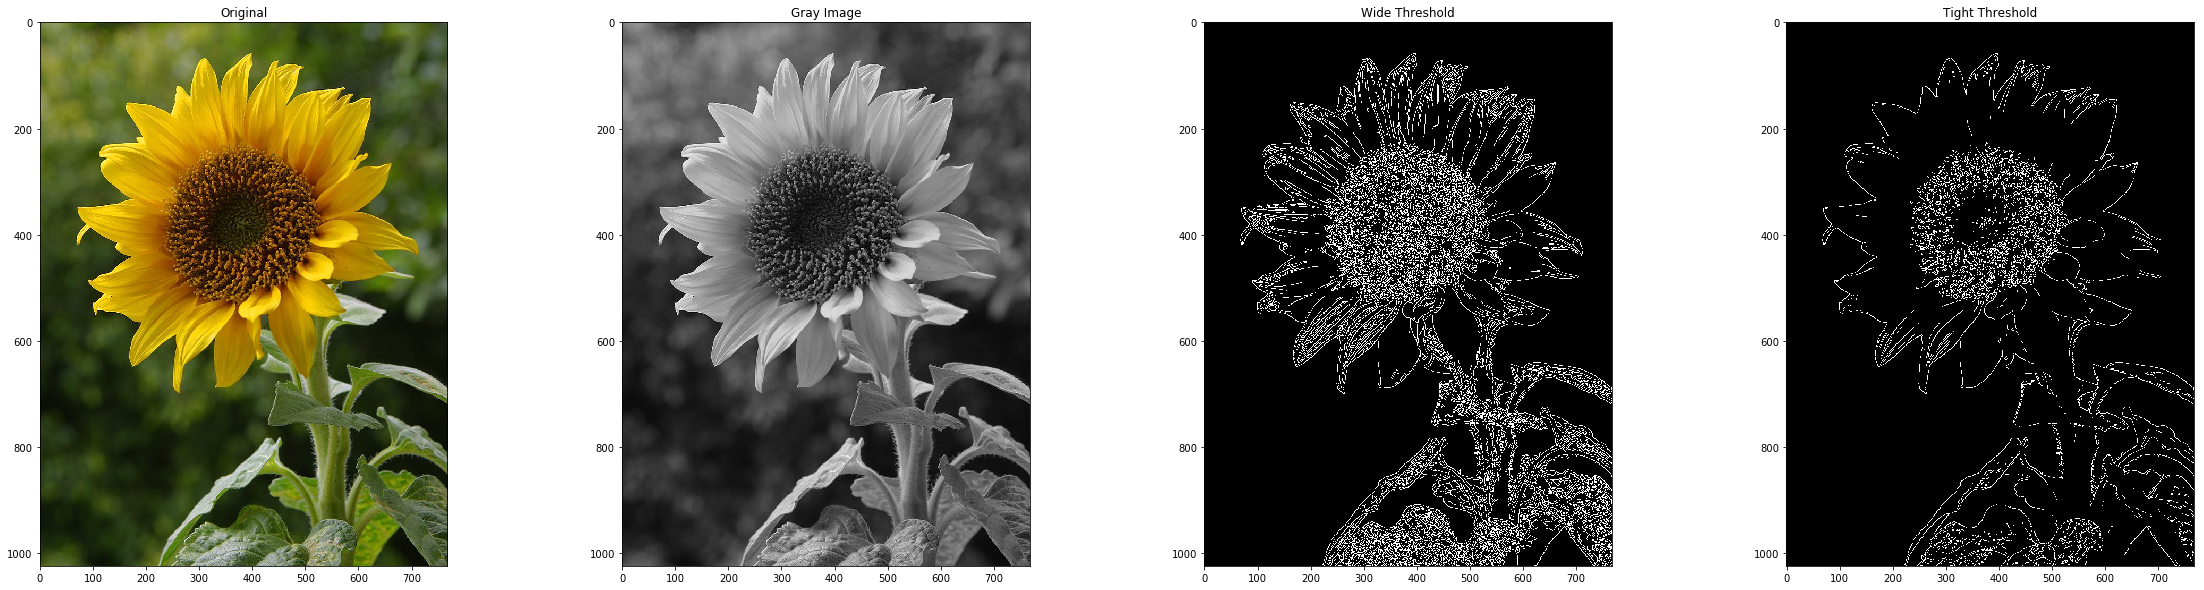

In [57]:
# Implementing Canny edge detection
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

image = cv2.imread('img/sunflower.jpg') # Read the image
image_RGB = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # Change color from BGR to RGB
gray = cv2.cvtColor(image_RGB, cv2.COLOR_RGB2GRAY) # Change color from RGB to Gray

# Recommended to have low to high threshold ratio of 1:2 (for best results use 1:3)
# Lets create  two thresholds - Wide and Tight
wide = cv2.Canny(gray,30,100)
tight =cv2.Canny(gray,180,240)

# Displaying images
f,(ax1,ax2,ax3,ax4) = plt.subplots(1,4,figsize=(40,10))

ax1.set_title('Original')
ax1.imshow(image_RGB)

ax2.set_title('Gray Image')
ax2.imshow(gray, cmap='gray')

ax3.set_title('Wide Threshold')
ax3.imshow(wide, cmap='gray')

ax4.set_title('Tight Threshold')
ax4.imshow(tight, cmap='gray')

In [67]:
test = [10,20,30,40,50,60, 60,30,20,20]
from collections import Counter
y = Counter(test)
print (y)

Counter({20: 3, 30: 2, 60: 2, 10: 1, 40: 1, 50: 1})


In [73]:
test1 = [[10,20,30,40,50,60, 60,30,20,20], [10,20,30],[10,20,30,40],[10,20,30]]
z = Counter([len(x) for x in test1])
print(z)

Counter({3: 2, 10: 1, 4: 1})


In [74]:
min(z), max(z)

(3, 10)

In [ ]:
<img src="img/blur.PNG" width="500">


   
   

   
**Edge Handling**
- Kernel convolution relies on centering a pixel and looking at it's surrounding neighbors. So, what do you do if there are no surrounding pixels like on an image corner or edge?
- There a number of ways to process the edges
- Extend The nearest border pixels are conceptually extended as far as necessary to provide values for the convolution. Corner pixels are extended in 90° wedges. Other edge pixels are extended in lines.
- Padding The image is padded with a border of 0's, black pixels.
- Crop Any pixel in the output image which would require values from beyond the edge is skipped. This method can result in the output image being slightly smaller, with the edges having been cropped.

**Convolution operation in action**

- local connection
<img src="img/localconnection.PNG">
<img src="img/con operation1.PNG">